<a href="https://colab.research.google.com/github/JahnaviVS25/CODSOFT/blob/main/customer_churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
!pip install kaggle

In [26]:
path="/content/drive/MyDrive/Colab Notebooks/kaggle_dataset/Churn_Modelling.csv"


In [27]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/drive/MyDrive/Colab Notebooks/kaggle_dataset'

In [28]:
!pwd

/content/drive/MyDrive/Colab Notebooks/kaggle_dataset


In [31]:
%cd /content/drive/MyDrive/Colab Notebooks/kaggle_dataset

/content/drive/MyDrive/Colab Notebooks/kaggle_dataset


In [24]:
!pwd

/content/drive/MyDrive/Colab Notebooks/kaggle_dataset


In [36]:

from logging import warning
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [37]:
df = pd.read_csv('Churn_Modelling.csv')

In [38]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [39]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [40]:

print('df:', df.shape)

df: (10000, 14)


In [41]:

df.duplicated().sum()


0

In [42]:
df.isnull().sum()


RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [43]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [44]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [45]:
df.describe()


,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


<Axes: >

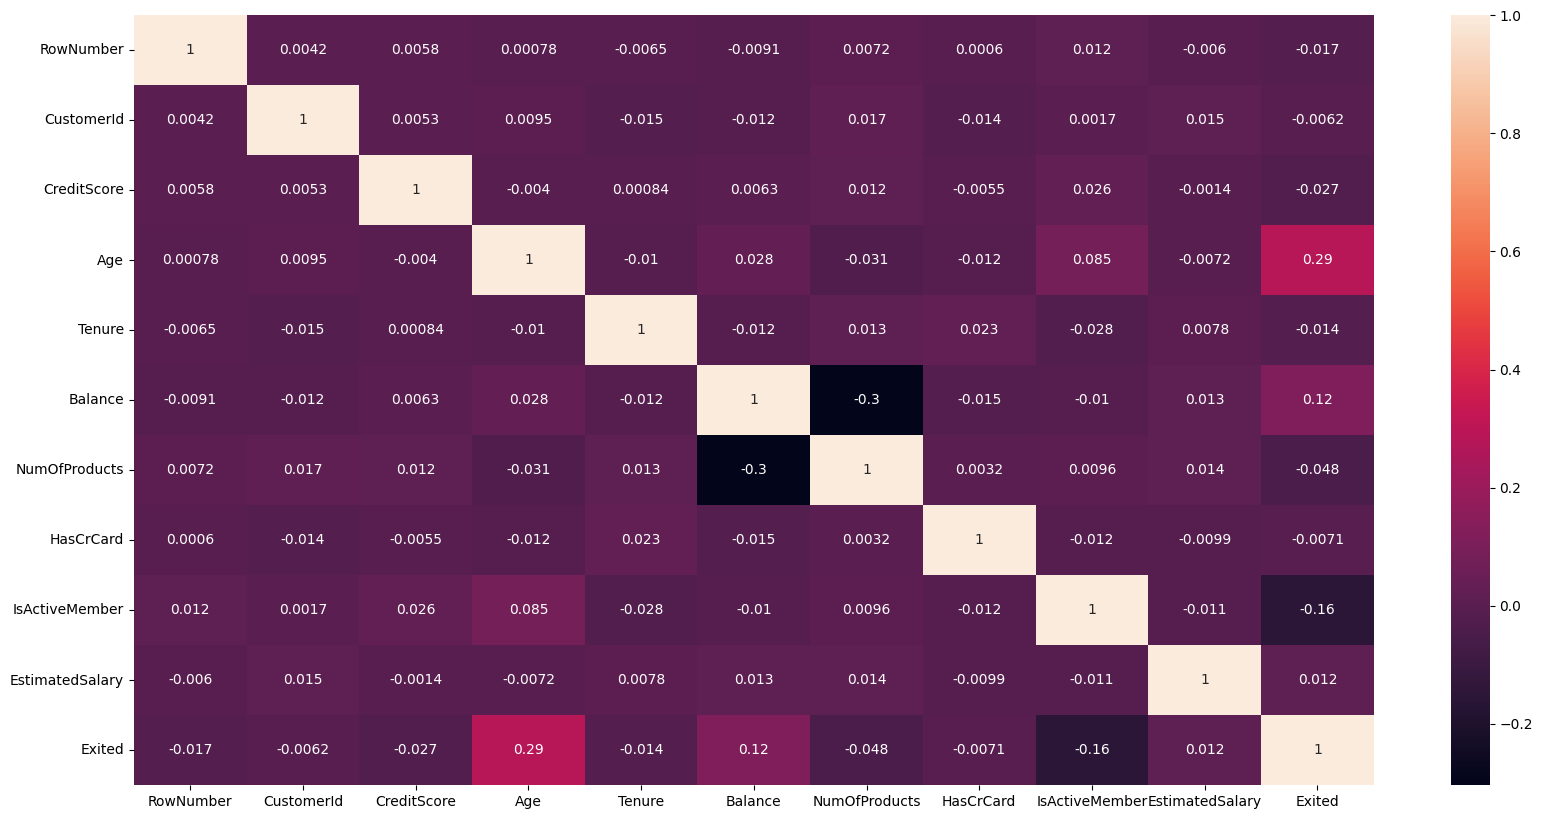

In [46]:

plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)

In [47]:

col = []
for i in df.columns:
  num = len(df[i].unique())
  print(i,':', str(num) + str(' Distinct values'))
  #append < 10 distinct values columns in list
  if num < 10:
    col.append(i)

RowNumber : 10000 Distinct values
CustomerId : 10000 Distinct values
Surname : 2932 Distinct values
CreditScore : 460 Distinct values
Geography : 3 Distinct values
Gender : 2 Distinct values
Age : 70 Distinct values
Tenure : 11 Distinct values
Balance : 6382 Distinct values
NumOfProducts : 4 Distinct values
HasCrCard : 2 Distinct values
IsActiveMember : 2 Distinct values
EstimatedSalary : 9999 Distinct values
Exited : 2 Distinct values


In [48]:
for i in col:
  print(df[i].value_counts(), '\n')

France     5014
Germany    2509
Spain      2477
Name: Geography, dtype: int64 

Male      5457
Female    4543
Name: Gender, dtype: int64 

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64 

1    7055
0    2945
Name: HasCrCard, dtype: int64 

1    5151
0    4849
Name: IsActiveMember, dtype: int64 

0    7963
1    2037
Name: Exited, dtype: int64 



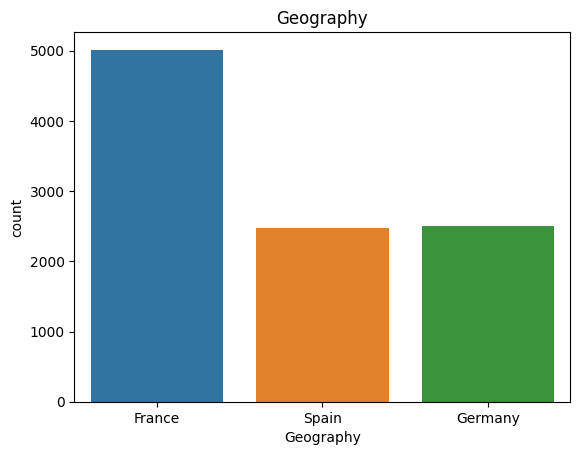

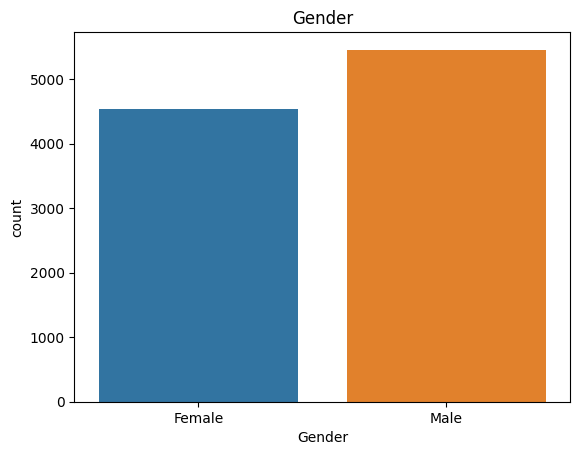

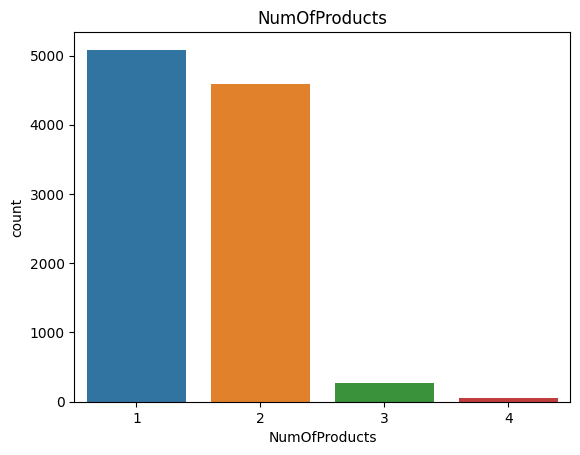

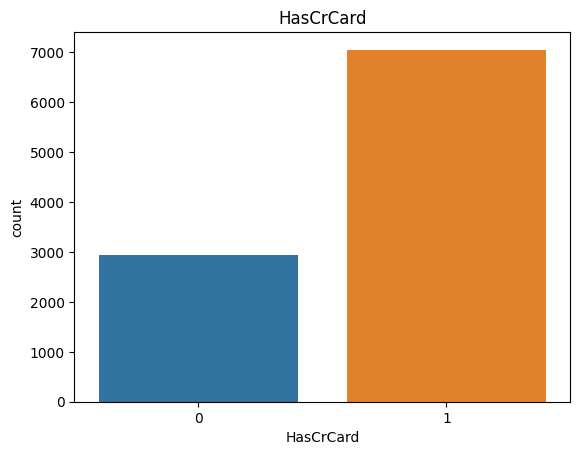

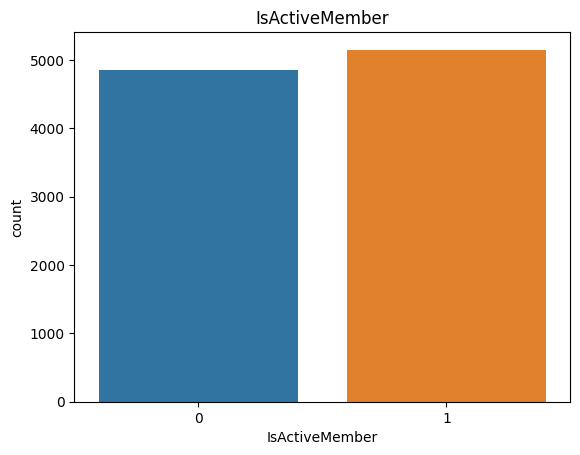

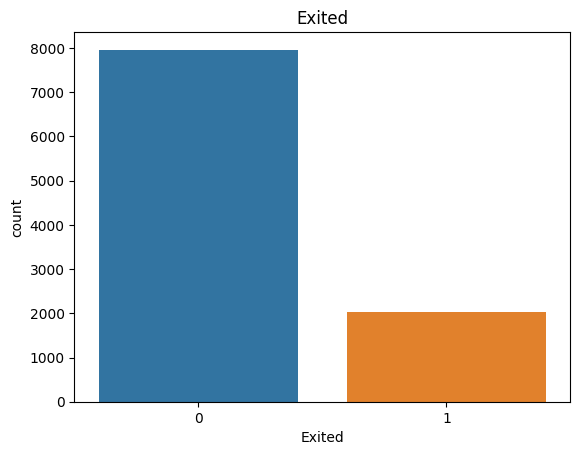

In [49]:

for i in col:
  sns.countplot(x=i, data=df)
  plt.title(i)
  plt.show()

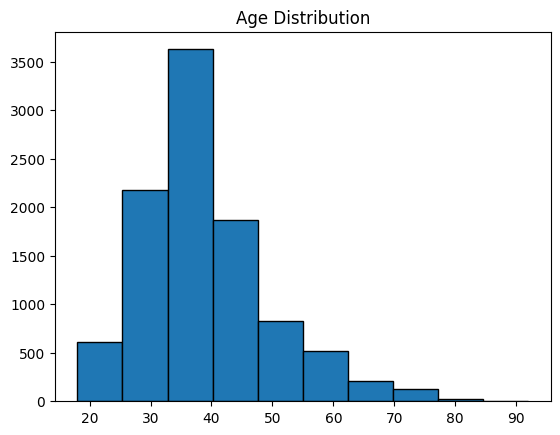

In [50]:

plt.hist(df['Age'], edgecolor='black')
plt.title('Age Distribution')
plt.show()

In [51]:

df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True )


In [53]:
df.head()


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [54]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['Gender'] = le.fit_transform(df['Gender'])


In [55]:
df = pd.get_dummies(data = df, columns=['Geography'], drop_first=True)

In [56]:
df.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,0,1


In [57]:
a = df.iloc[:,-3:-2]

In [58]:
a.head()

,Exited
0,1
1,0
2,1
3,0
4,0


In [59]:

df.drop(columns=['Exited'], inplace = True)

In [60]:
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


In [61]:
df = pd.concat([df, a], axis=1)


In [62]:
df.head()


,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Exited
0,619,0,42,2,0.00,1,1,1,101348.88,0,0,1
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1,0
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0,1
3,699,0,39,1,0.00,2,0,0,93826.63,0,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1,0


<Axes: >

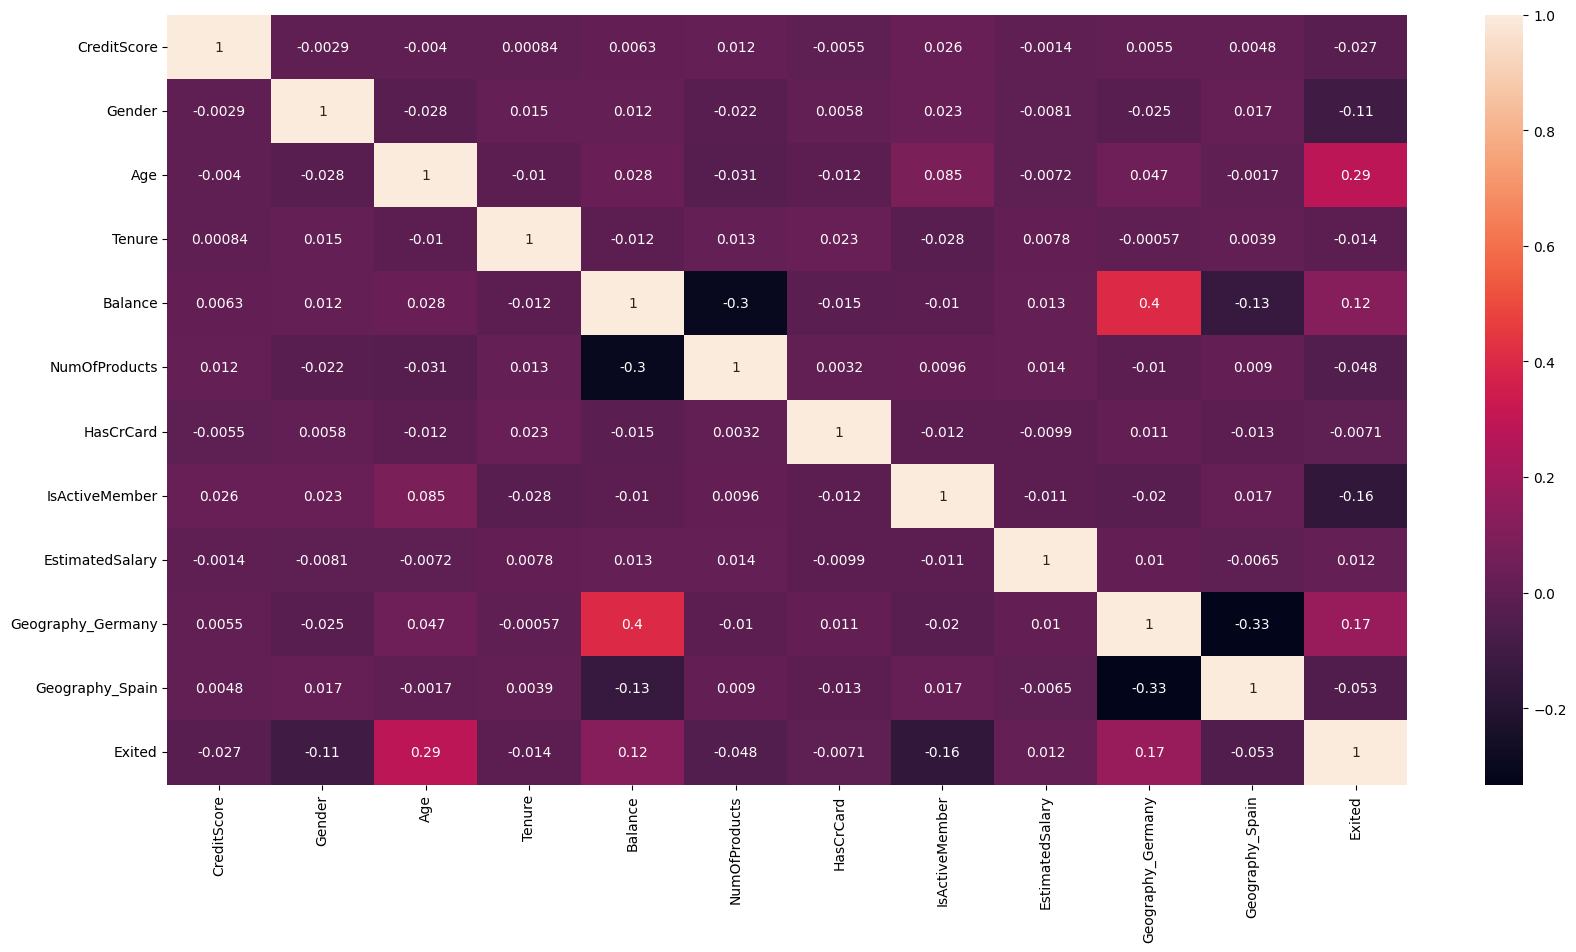

In [63]:
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot = True)


In [64]:

x = df.iloc[:, :-1].values
y = df.iloc[:,-1].values

In [65]:

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=42)


In [66]:
print(x_train.shape, x_test.shape)
print(y_train.shape, y_test.shape)


(8000, 11) (2000, 11)
(8000,) (2000,)


In [67]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [68]:

from sklearn.linear_model import LogisticRegression
log = LogisticRegression(random_state = 42)
log.fit(x_train, y_train)


LogisticRegression(random_state=42)

In [69]:
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
R = RandomForestClassifier(n_estimators=5 ,random_state = 42)
R.fit(x_train, y_train)

RandomForestClassifier(n_estimators=5, random_state=42)

In [70]:

clf = GradientBoostingClassifier(n_estimators=10, learning_rate=1.0, random_state=42)
clf.fit(x_train, y_train)


GradientBoostingClassifier(learning_rate=1.0, n_estimators=10, random_state=42)

In [71]:
classifier = [log, R, clf]
model = ['Logistic Regression', 'Random Forest Classifier', 'Gradient Boosting Classifier']


for Logistic Regression:

81.10000000000001
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



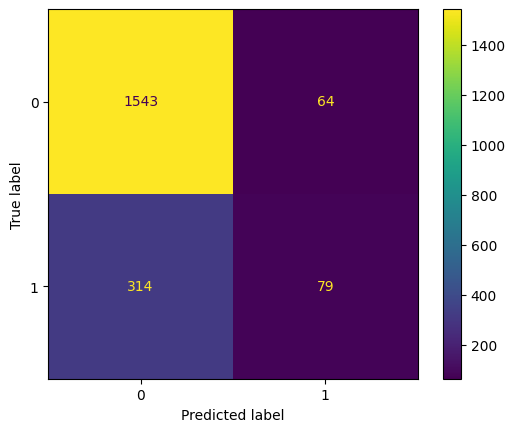


for Random Forest Classifier:

83.25
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1607
           1       0.59      0.48      0.53       393

    accuracy                           0.83      2000
   macro avg       0.73      0.70      0.71      2000
weighted avg       0.82      0.83      0.83      2000



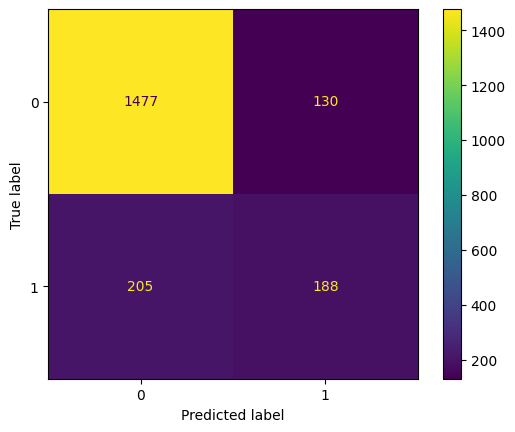


for Gradient Boosting Classifier:

85.65
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.47      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.84      2000



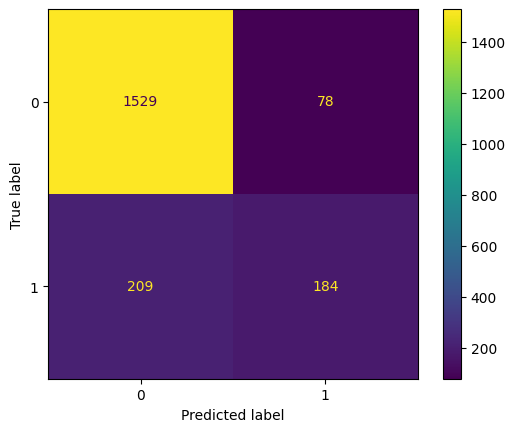

In [72]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print(accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

In [73]:

from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.88 %
Standard Deviation: 1.10 %
Accuracy: 84.19 %
Standard Deviation: 0.68 %
Accuracy: 85.50 %
Standard Deviation: 0.68 %


In [77]:
parameters = [{'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver' :['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'aga']}]
grid_search = GridSearchCV(estimator = log,
                           param_grid = parameters,
                           scoring = 'accuracy',
                           cv = 10,
                           n_jobs = -1)
grid_search.fit(x_train, y_train)
best_accuracy = grid_search.best_score_
best_parameters = grid_search.best_params_
print("Best Accuracy: {:.2f} %".format(best_accuracy*100))
print("Best Parameters:", best_parameters)


Best Accuracy: 81.20 %
Best Parameters: {'C': 0.01, 'penalty': 'l2', 'solver': 'lbfgs'}


In [78]:
log = LogisticRegression(C= 0.01, penalty = 'l2' ,random_state = 42)
log.fit(x_train, y_train)


LogisticRegression(C=0.01, random_state=42)


for Logistic Regression:

81.10000000000001
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      1607
           1       0.55      0.20      0.29       393

    accuracy                           0.81      2000
   macro avg       0.69      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



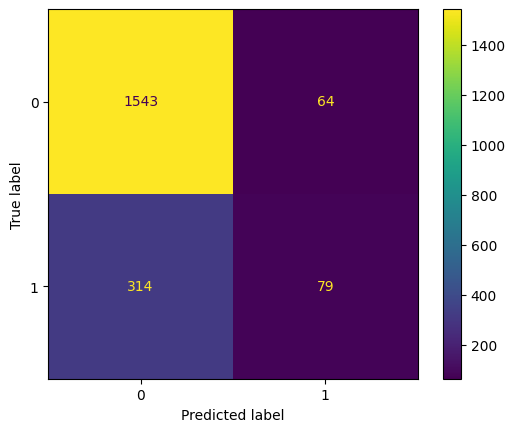


for Random Forest Classifier:

83.25
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      1607
           1       0.59      0.48      0.53       393

    accuracy                           0.83      2000
   macro avg       0.73      0.70      0.71      2000
weighted avg       0.82      0.83      0.83      2000



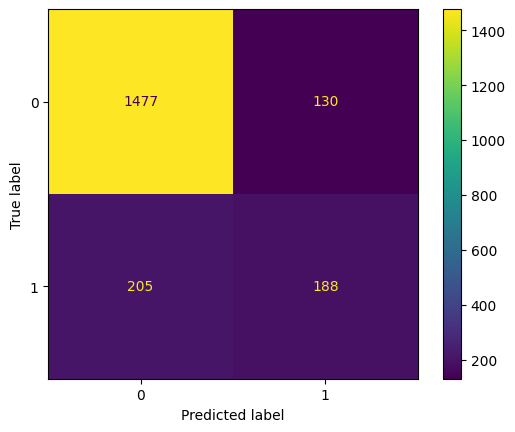


for Gradient Boosting Classifier:

85.65
              precision    recall  f1-score   support

           0       0.88      0.95      0.91      1607
           1       0.70      0.47      0.56       393

    accuracy                           0.86      2000
   macro avg       0.79      0.71      0.74      2000
weighted avg       0.84      0.86      0.84      2000



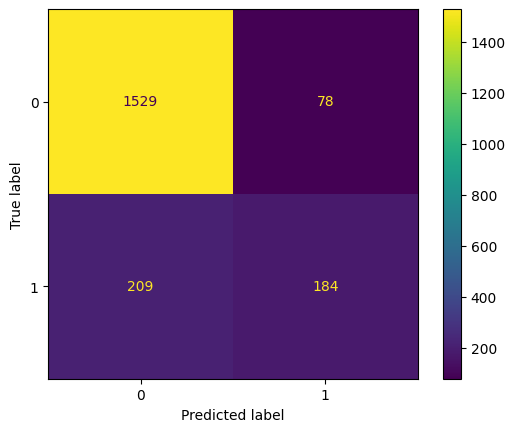

In [79]:

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, ConfusionMatrixDisplay
for i in range(len(classifier)):
  y_pred = classifier[i].predict(x_test)
  cm = confusion_matrix(y_test, y_pred)
  accuracy = accuracy_score(y_test, y_pred)*100
  print('\nfor ' + str(model[i]) + ':\n')
  disp = ConfusionMatrixDisplay(confusion_matrix=cm)
  plt.rcParams['axes.grid'] = False
  disp.plot()
  print(accuracy)
  print(classification_report(y_test, y_pred))
  plt.show()

In [80]:

from sklearn.model_selection import cross_val_score
for i in classifier:
  accuracies  = cross_val_score(estimator=i, X = x_train, y = y_train, cv = 10)
  print('Accuracy: {:.2f} %'.format(accuracies.mean()*100))
  print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))

Accuracy: 80.88 %
Standard Deviation: 1.10 %
Accuracy: 84.19 %
Standard Deviation: 0.68 %
Accuracy: 85.50 %
Standard Deviation: 0.68 %
